In [2]:
# Loading libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PowerTransformer,OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve,precision_score,recall_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [3]:
# Loading the data
df = pd.read_csv("D:\\Projects\\1.Machine Learning Projects\\2.Classification\\1_bank_subscription_prediction\\data\\bank.csv",sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# Columns in the dataset
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
# Shape of the dataframe
df.shape

(41188, 21)

In [6]:
# Datatypes of features
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [7]:
# Train Test Split
X = df.drop("y",inplace=False,axis=1)
y = df["y"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

print(f"The Shape of the X_train is {X_train.shape}")
print(f"The shape of the y_train is {y_train.shape}")
print(f"The shape of the X_test is {X_test.shape}")
print(f"The shape of the y_test is {y_test.shape}")

The Shape of the X_train is (32950, 20)
The shape of the y_train is (32950,)
The shape of the X_test is (8238, 20)
The shape of the y_test is (8238,)


# Univariate Anlaysis

In [8]:
num_cols = X_train.select_dtypes(include=[np.number])
num_cols

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
25611,49,227,4,999,0,-0.1,93.200,-42.0,4.120,5195.8
26010,37,202,2,999,1,-0.1,93.200,-42.0,4.120,5195.8
40194,78,1148,1,999,0,-1.7,94.215,-40.3,0.870,4991.6
297,36,120,2,999,0,1.1,93.994,-36.4,4.857,5191.0
36344,59,368,2,999,0,-2.9,92.963,-40.8,1.262,5076.2
...,...,...,...,...,...,...,...,...,...,...
40205,28,192,1,999,0,-1.7,94.215,-40.3,0.876,4991.6
27316,52,64,1,999,1,-0.1,93.200,-42.0,4.021,5195.8
14392,54,131,4,999,0,1.4,93.918,-42.7,4.962,5228.1
7494,29,165,1,999,0,1.1,93.994,-36.4,4.864,5191.0


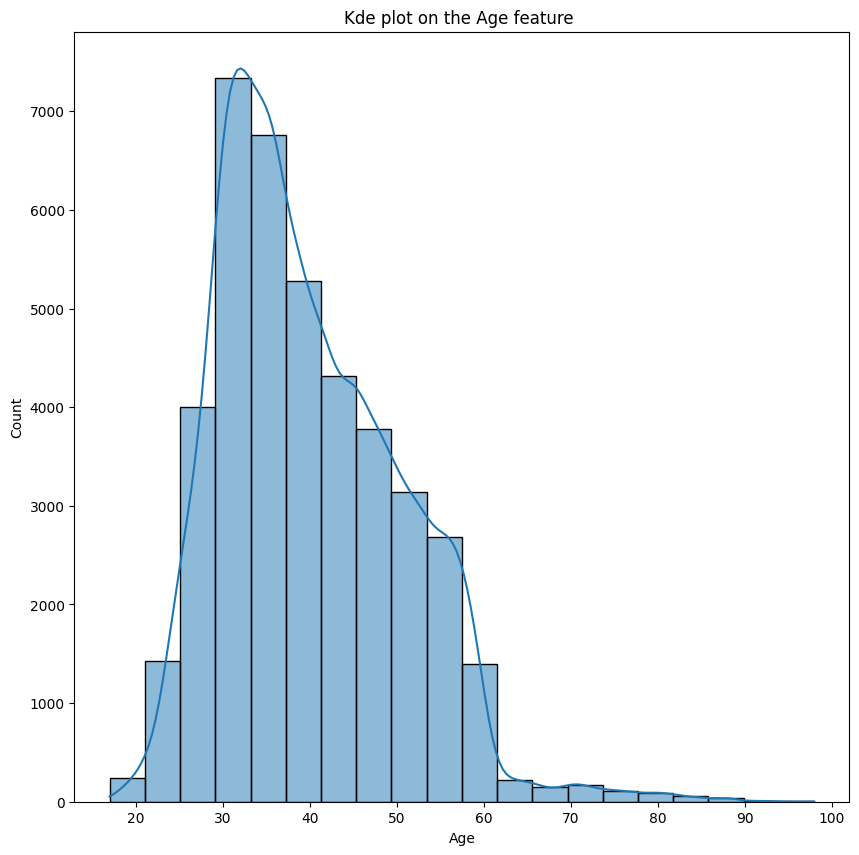

In [9]:
# KDE Plot on the Age Feature to check the skewness
plt.figure(figsize=(10,10))
sns.histplot(data=df,x="age",bins=20,kde=True)
plt.title("Kde plot on the Age feature ")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [10]:
# The distribution is right skewed in the both categories

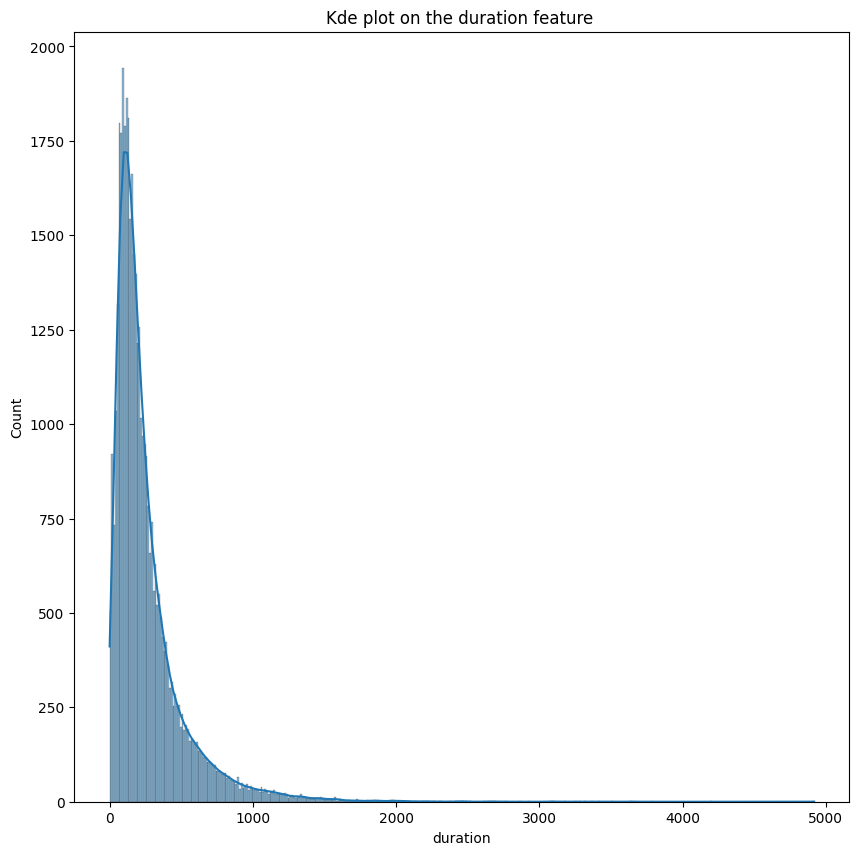

In [11]:
# KDE Plot on the Duration Feature to check the skewness
plt.figure(figsize=(10,10))
sns.histplot(data=df,x="duration",kde=True)
plt.title("Kde plot on the duration feature ")
plt.xlabel("duration")
plt.ylabel("Count")
plt.show()

In [12]:
# This feature is also right skewed with the outliers

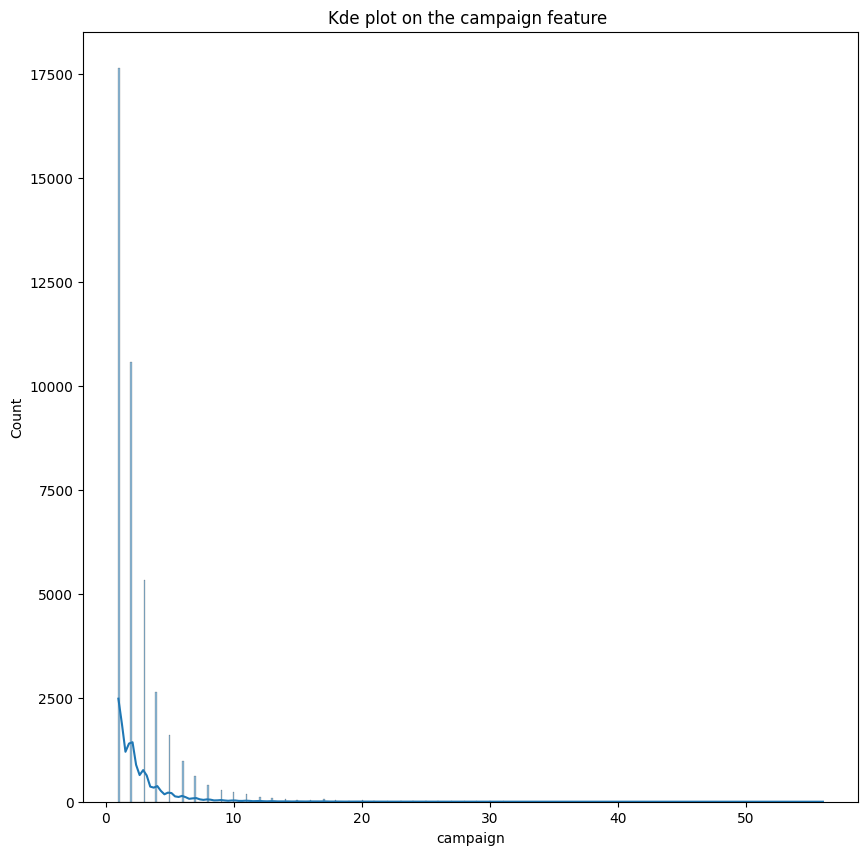

In [13]:
# KDE Plot on the campaign Feature to check the skewness
plt.figure(figsize=(10,10))
sns.histplot(data=df,x="campaign",kde=True)
plt.title("Kde plot on the campaign feature ")
plt.xlabel("campaign")
plt.ylabel("Count")
plt.show()